In [5]:
import pandas as pd
import missingno as msno

In [2]:
df = pd.read_csv('data/ecommerce-data.csv')

<Axes: >

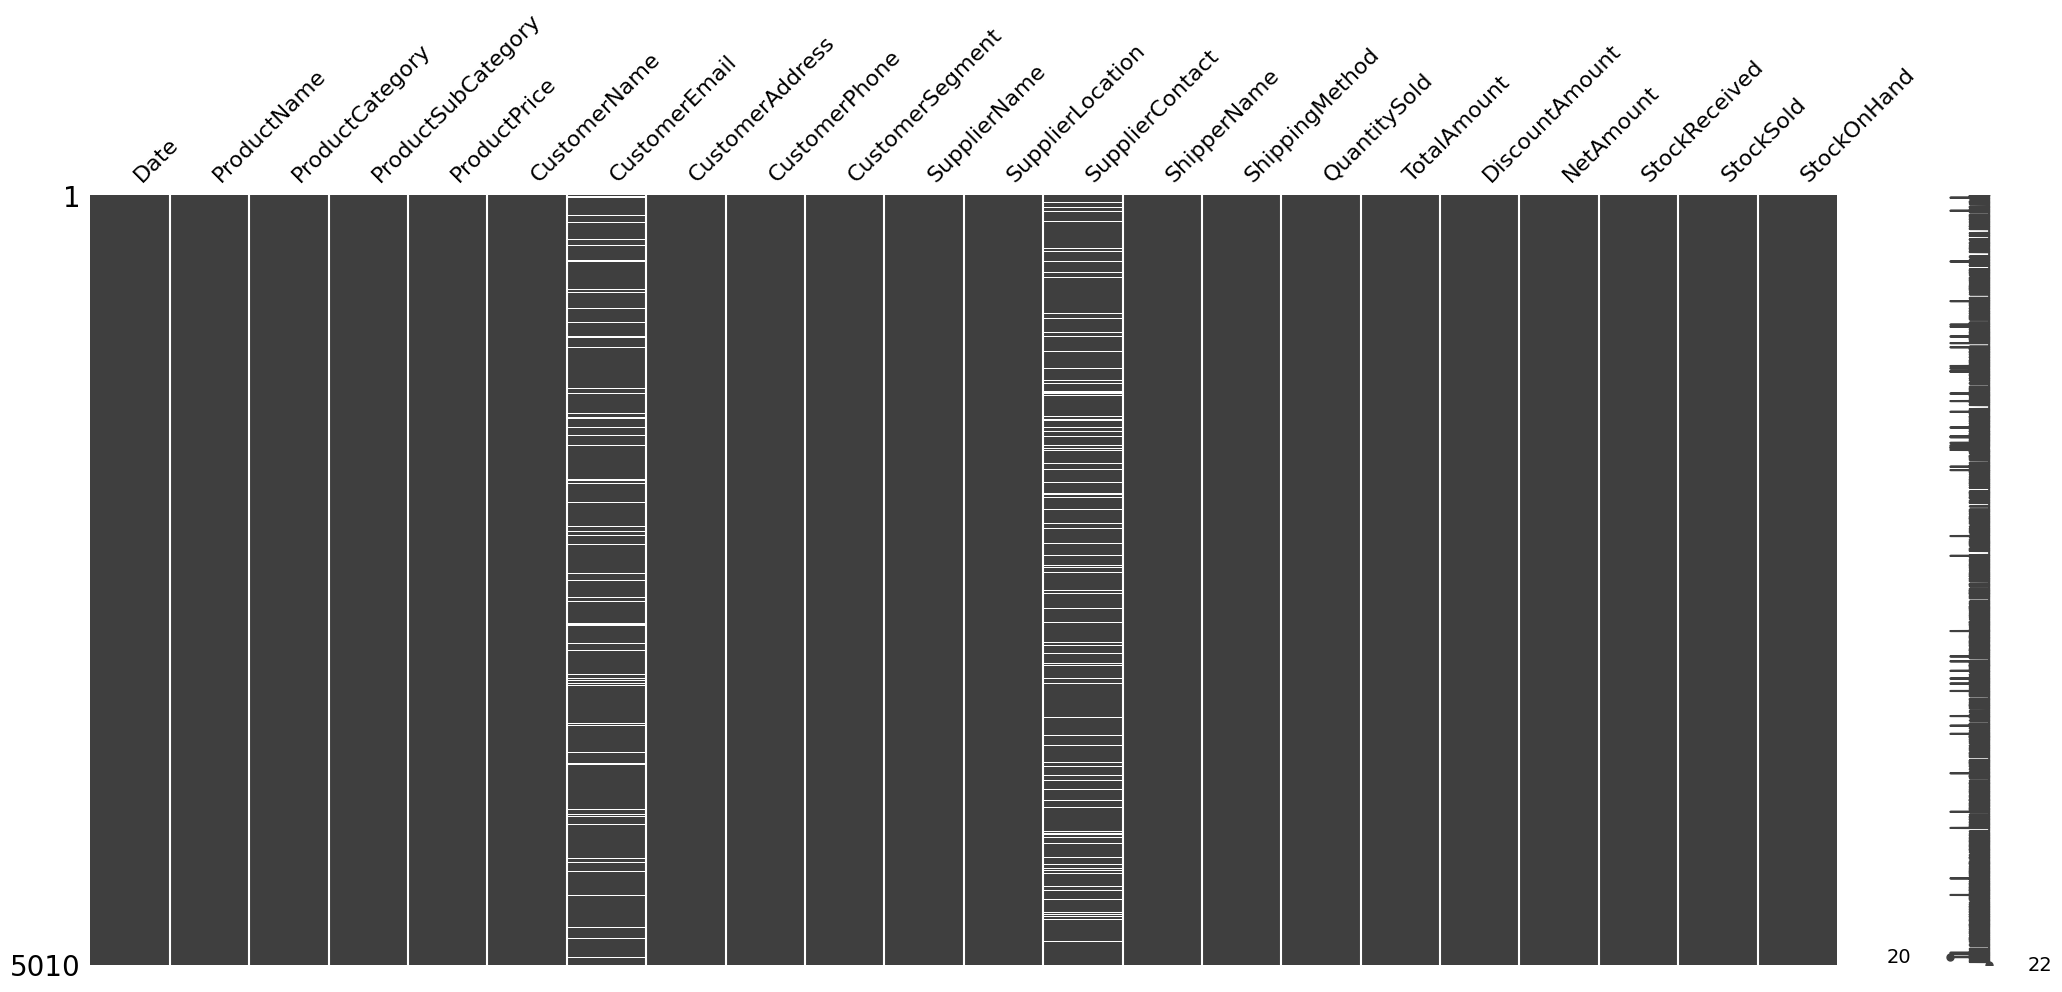

In [6]:
msno.matrix(df)

In [7]:
list(df.columns)

['Date',
 'ProductName',
 'ProductCategory',
 'ProductSubCategory',
 'ProductPrice',
 'CustomerName',
 'CustomerEmail',
 'CustomerAddress',
 'CustomerPhone',
 'CustomerSegment',
 'SupplierName',
 'SupplierLocation',
 'SupplierContact',
 'ShipperName',
 'ShippingMethod',
 'QuantitySold',
 'TotalAmount',
 'DiscountAmount',
 'NetAmount',
 'StockReceived',
 'StockSold',
 'StockOnHand']

In [46]:
dataDim = df[['Date']] 
productDim = df[[ 'ProductName', 'ProductCategory', 'ProductSubCategory', 'ProductPrice']]
customerDim = df[[ 'CustomerName', 'CustomerEmail', 'CustomerAddress', 'CustomerPhone', 'CustomerSegment',]]
supplierDim = df[['SupplierName','SupplierLocation','SupplierContact']]
shipperDim = [['ShipperName', 'ShippingMethod']]
salesFact = df[['QuantitySold', 'TotalAmount', 'DiscountAmount', 'NetAmount',]]
inventoryFact = df[['StockReceived', 'StockSold', 'StockOnHand']]

## table de dimention produits

In [66]:
unique_values = productDim['ProductName'].unique()
list(unique_values)


['Nathaniel',
 'NonExistentProduct',
 'Angela',
 'Amy',
 'Justin',
 'Shannon',
 'Martha',
 'Elizabeth',
 'Jamie',
 'Robert',
 'Shawn',
 'Anthony',
 'Pamela',
 'Fred',
 'Wanda',
 'Cynthia',
 'Marvin',
 'Katie',
 'Tammy',
 'Michael',
 'Kristine']

In [21]:
productDim.describe()

,ProductName,ProductCategory,ProductSubCategory,ProductPrice
count,5010,5010,5010,5010
unique,21,6,13,43
top,NonExistentProduct,Electronics,Headphones,InvalidPrice
freq,462,1575,1227,449


In [24]:
# 1. Grouper par 'product_name' et compter les valeurs uniques pour 'ProductCategory' et 'ProductSubCategory'
check_consistency = productDim.groupby('ProductName').agg({
    'ProductCategory': 'nunique',
    'ProductSubCategory': 'nunique'
})

In [25]:
check_consistency

,ProductCategory,ProductSubCategory
ProductName,,
Amy,2,1
Angela,2,1
Anthony,2,1
Cynthia,2,1
Elizabeth,2,1
Fred,2,1
Jamie,2,1
Justin,2,1
Katie,2,1


In [ ]:
product_categories = productDim.groupby('ProductName')['ProductCategory'].unique()


for product_name, categories in product_categories.items():
    print(f"Produit: {product_name} - Catégories possibles: {list(categories)}")


Produit: Amy - Catégories possibles: ['Home & Garden', 'InvalidCategory']
Produit: Angela - Catégories possibles: ['InvalidCategory', 'Toys']
Produit: Anthony - Catégories possibles: ['Books', 'InvalidCategory']
Produit: Cynthia - Catégories possibles: ['Electronics', 'InvalidCategory']
Produit: Elizabeth - Catégories possibles: ['InvalidCategory', 'Clothing']
Produit: Fred - Catégories possibles: ['InvalidCategory', 'Books']
Produit: Jamie - Catégories possibles: ['Books', 'InvalidCategory']
Produit: Justin - Catégories possibles: ['Electronics', 'InvalidCategory']
Produit: Katie - Catégories possibles: ['Books', 'InvalidCategory']
Produit: Kristine - Catégories possibles: ['Electronics', 'InvalidCategory']
Produit: Martha - Catégories possibles: ['Books', 'InvalidCategory']
Produit: Marvin - Catégories possibles: ['Clothing', 'InvalidCategory']
Produit: Michael - Catégories possibles: ['InvalidCategory', 'Toys']
Produit: Nathaniel - Catégories possibles: ['Electronics', 'InvalidCateg

In [ ]:
# Attribuer la bonne catégory au bon nom de produit
category_mapping = {
    'Nathaniel': 'Electronics',
    'NonExistentProduct': None,
    'Angela': 'Toys',
    'Amy': 'Home & Garden',
    'Justin': 'Electronics',
    'Shannon': 'Home & Garden',
    'Martha': 'Books',
    'Elizabeth': 'Clothing',
    'Jamie': 'Books',
    'Robert': 'Electronics',
    'Shawn': 'Electronics',
    'Anthony': 'Books',
    'Pamela': 'Electronics',
    'Fred': 'Books',
    'Wanda': 'Toys',
    'Cynthia': 'Electronics',
    'Marvin': 'Clothing',
    'Katie': 'Books',
    'Tammy': 'Home & Garden',
    'Michael': 'Toys',
    'Kristine': 'Electronics'
}


productDim['TrueCateg'] = productDim['ProductName'].map(category_mapping)


productDim

C:\Users\sakhr\AppData\Local\Temp\ipykernel_12620\971887779.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  productDim['TrueCateg'] = productDim['ProductName'].map(category_mapping)


,ProductName,ProductCategory,ProductSubCategory,ProductPrice,TrueCateg
0,Nathaniel,Electronics,Camera,0.01,Electronics
1,NonExistentProduct,Electronics,Mobile,847.43,None
2,Angela,InvalidCategory,Action Figures,386.57,Toys
3,Amy,Home & Garden,Decor,364.01,Home & Garden
4,Nathaniel,Electronics,Camera,652.35,Electronics
...,...,...,...,...,...
5005,Angela,Toys,Action Figures,386.57,Toys
5006,Angela,Toys,Action Figures,386.57,Toys
5007,Angela,Toys,Action Figures,386.57,Toys
5008,Angela,Toys,Action Figures,386.57,Toys


In [64]:
# étude au niveau de l'incohérence des prix
price_occurrences_with_product = productDim.groupby(['ProductCategory', 'ProductSubCategory', 'ProductName'])['ProductPrice'].value_counts()

current_product = None
for (category, subcategory, product_name, price), count in price_occurrences_with_product.items():

    if product_name != current_product:
        if current_product is not None:
            print("="*30)  
        current_product = product_name
        
    print(f"Catégorie: {category}, Sous-catégorie: {subcategory}, Produit: {product_name}, Prix: {price} - Occurrences: {count}")


Catégorie: Books, Sous-catégorie: Academic, Produit: Anthony, Prix: 693.39 - Occurrences: 168
Catégorie: Books, Sous-catégorie: Academic, Produit: Anthony, Prix: 69339.0 - Occurrences: 18
Catégorie: Books, Sous-catégorie: Academic, Produit: Anthony, Prix: InvalidPrice - Occurrences: 18
Catégorie: Books, Sous-catégorie: Academic, Produit: Anthony, Prix: 99999.99 - Occurrences: 15
Catégorie: Books, Sous-catégorie: Academic, Produit: Anthony, Prix: 0.01 - Occurrences: 8
Catégorie: Books, Sous-catégorie: Academic, Produit: Fred, Prix: 951.53 - Occurrences: 148
Catégorie: Books, Sous-catégorie: Academic, Produit: Fred, Prix: InvalidPrice - Occurrences: 28
Catégorie: Books, Sous-catégorie: Academic, Produit: Fred, Prix: 95153.0 - Occurrences: 19
Catégorie: Books, Sous-catégorie: Academic, Produit: Fred, Prix: 99999.99 - Occurrences: 12
Catégorie: Books, Sous-catégorie: Academic, Produit: Fred, Prix: 0.01 - Occurrences: 10
Catégorie: Books, Sous-catégorie: Academic, Produit: NonExistentProduc

In [68]:


price_mapping = {
'Nathaniel': 652.35,
 'NonExistentProduct':None,
 'Angela' : 386.57,
 'Amy':364.01,
 'Justin':660.05,
 'Shannon':68.01,
 'Martha':433.1, 
 'Elizabeth':840.19, 
 'Jamie':930.3,
 'Robert':847.43,
 'Shawn':461.09,
 'Anthony':693.39,
 'Pamela':651.11,  
 'Fred':951.53,  
 'Wanda':268.61,
 'Cynthia':872.85,
 'Marvin':995.13,
 'Katie':642.11,  
 'Tammy':431.82,
 'Michael':46.23,
 'Kristine':228.82
}

productDim['TruePrice'] = productDim['ProductName'].map(price_mapping)


productDim

C:\Users\sakhr\AppData\Local\Temp\ipykernel_12620\728274632.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  productDim['TruePrice'] = productDim['ProductName'].map(price_mapping)


,ProductName,ProductCategory,ProductSubCategory,ProductPrice,TrueCateg,TruePrice
0,Nathaniel,Electronics,Camera,0.01,Electronics,652.35
1,NonExistentProduct,Electronics,Mobile,847.43,None,NaN
2,Angela,InvalidCategory,Action Figures,386.57,Toys,386.57
3,Amy,Home & Garden,Decor,364.01,Home & Garden,364.01
4,Nathaniel,Electronics,Camera,652.35,Electronics,652.35
...,...,...,...,...,...,...
5005,Angela,Toys,Action Figures,386.57,Toys,386.57
5006,Angela,Toys,Action Figures,386.57,Toys,386.57
5007,Angela,Toys,Action Figures,386.57,Toys,386.57
5008,Angela,Toys,Action Figures,386.57,Toys,386.57


In [72]:
# correspondace subcategorie et productname

# Afficher les correspondances entre productName et productSubCategory
correspondanceSubCat = productDim[['ProductName', 'ProductSubCategory']].drop_duplicates()

# Afficher la table des correspondances
print(correspondanceSubCat)

            ProductName ProductSubCategory
0             Nathaniel             Camera
1    NonExistentProduct             Mobile
2                Angela     Action Figures
3                   Amy              Decor
6                Justin         Headphones
7    NonExistentProduct             Camera
8               Shannon    Gardening Tools
9    NonExistentProduct              Decor
10               Martha            Fiction
12            Elizabeth              Shirt
13                Jamie            Fiction
14   NonExistentProduct            Fiction
16               Robert             Mobile
17                Shawn         Headphones
18              Anthony           Academic
20               Pamela         Headphones
22                 Fred           Academic
24                Wanda        Educational
28   NonExistentProduct           Academic
29              Cynthia         Headphones
31               Marvin              Shirt
32                Katie        Non-fiction
40   NonExi

In [96]:
import pandas as pd
import numpy as np

def assigner_nom_produit(row):
    # Récupérer les valeurs de la ligne
    cat = row['ProductCategory'] if pd.notna(row['ProductCategory']) else row['TrueCateg']
    subcat = row['ProductSubCategory']
    
    # Convertir le prix en float, en utilisant TruePrice si ProductPrice n'est pas disponible
    try:
        price = float(row['ProductPrice']) if pd.notna(row['ProductPrice']) else float(row['TruePrice'])
    except ValueError:
        # Si la conversion échoue, retourner le nom original du produit
        return row['ProductName']

    # Définir les correspondances
    correspondances = [
        ("Electronics", "Camera", 652.35, "Nathaniel"),
        ("Electronics", "Headphones", 660.05, "Justin"),
        ("Electronics", "Headphones", 461.09, "Shawn"),
        ("Electronics", "Headphones", 651.11, "Pamela"),
        ("Electronics", "Headphones", 872.85, "Cynthia"),
        ("Electronics", "Headphones", 228.82, "Kristine"),
        ("Electronics", "Mobile", 847.43, "Robert"),
        ("Toys", "Action Figures", 386.57, "Angela"),
        ("Toys", "Dolls", 46.23, "Michael"),
        ("Home", "Decor", 364.01, "Amy"),
        ("Home", "Furniture", 431.82, "Tammy"),
        ("Garden", "Gardening Tools", 68.01, "Shannon"),
        ("Books", "Fiction", 433.1, "Martha"),
        ("Books", "Fiction", 930.3, "Jamie"),
        ("Books", "Academic", 693.39, "Anthony"),
        ("Books", "Academic", 951.53, "Fred"),
        ("Books", "Educational", 268.61, "Wanda"),
        ("Books", "Non-fiction", 642.11, "Katie"),
        ("Clothing", "Shirt", 840.19, "Elizabeth"),
        ("Clothing", "Shirt", 995.13, "Marvin")
    ]

    # Vérifier les correspondances
    for c, s, p, name in correspondances:
        if cat == c and subcat == s and np.isclose(price, p, atol=0.01):
            return name

    return row['ProductName']  # Retourner le nom original si pas de correspondance

# Appliquer la fonction à chaque ligne du DataFrame
productDim['NameProduct'] = productDim.apply(assigner_nom_produit, axis=1)

# Afficher le DataFrame mis à jour
print(productDim)

             ProductName  ProductCategory ProductSubCategory ProductPrice  \
0              Nathaniel      Electronics             Camera         0.01   
1     NonExistentProduct      Electronics             Mobile       847.43   
2                 Angela  InvalidCategory     Action Figures       386.57   
3                    Amy    Home & Garden              Decor       364.01   
4              Nathaniel      Electronics             Camera       652.35   
...                  ...              ...                ...          ...   
5005              Angela             Toys     Action Figures       386.57   
5006              Angela             Toys     Action Figures       386.57   
5007              Angela             Toys     Action Figures       386.57   
5008              Angela             Toys     Action Figures       386.57   
5009              Angela             Toys     Action Figures       386.57   

          TrueCateg  TruePrice NameProduct  
0       Electronics     652.35

C:\Users\sakhr\AppData\Local\Temp\ipykernel_12620\925602145.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  productDim['NameProduct'] = productDim.apply(assigner_nom_produit, axis=1)


In [97]:
productDim

,ProductName,ProductCategory,ProductSubCategory,ProductPrice,TrueCateg,TruePrice,NameProduct
0,Nathaniel,Electronics,Camera,0.01,Electronics,652.35,Nathaniel
1,NonExistentProduct,Electronics,Mobile,847.43,None,NaN,Robert
2,Angela,InvalidCategory,Action Figures,386.57,Toys,386.57,Angela
3,Amy,Home & Garden,Decor,364.01,Home & Garden,364.01,Amy
4,Nathaniel,Electronics,Camera,652.35,Electronics,652.35,Nathaniel
...,...,...,...,...,...,...,...
5005,Angela,Toys,Action Figures,386.57,Toys,386.57,Angela
5006,Angela,Toys,Action Figures,386.57,Toys,386.57,Angela
5007,Angela,Toys,Action Figures,386.57,Toys,386.57,Angela
5008,Angela,Toys,Action Figures,386.57,Toys,386.57,Angela


<Axes: >

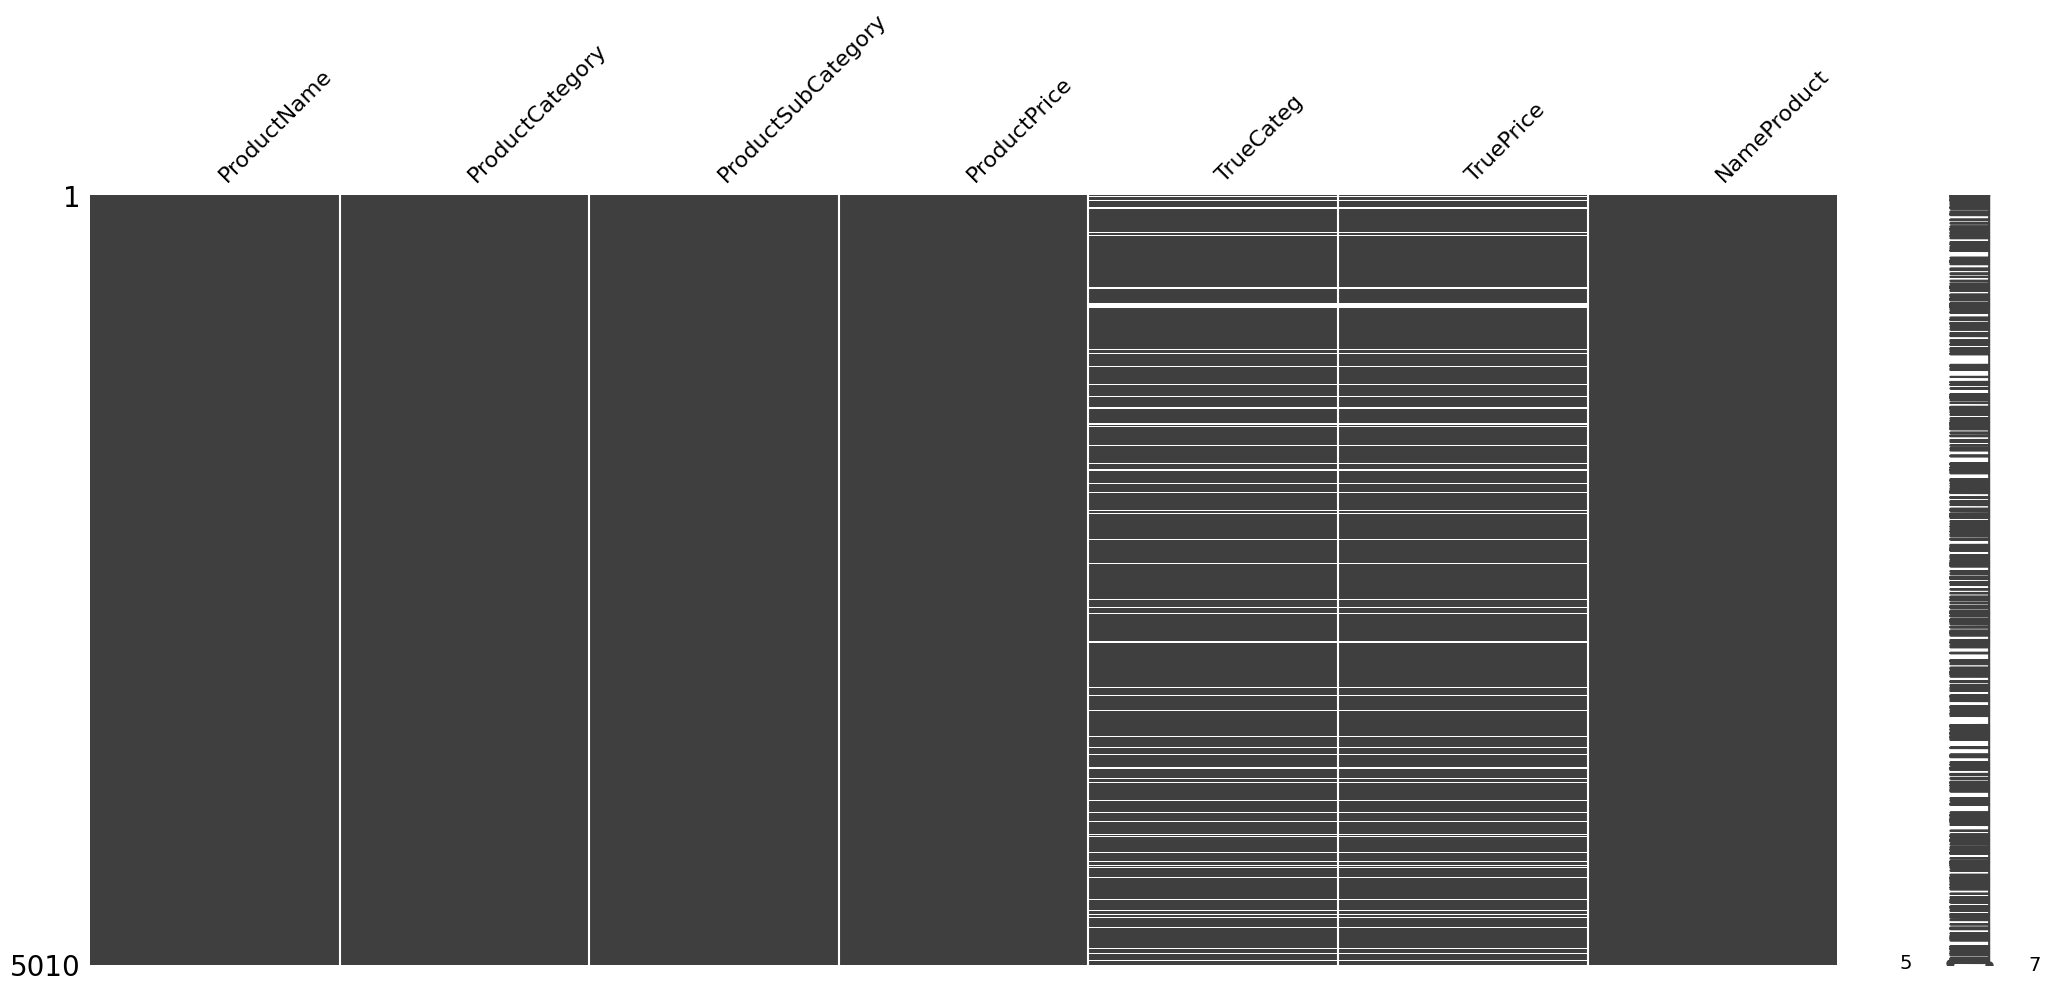

In [98]:
msno.matrix(productDim)

In [113]:
productDim.NameProduct.unique()

array(['Nathaniel', 'Robert', 'Angela', 'Amy', 'Justin', 'Shannon',
       'Martha', 'Elizabeth', 'Jamie', 'NonExistentProduct', 'Shawn',
       'Anthony', 'Pamela', 'Fred', 'Wanda', 'Cynthia', 'Marvin', 'Katie',
       'Michael', 'Tammy', 'Kristine'], dtype=object)

In [84]:
subCatMapping = {
("Camera",652.35):"Nathaniel",
("Action Figures",386.57):"Angela",
("Decor",364.01):"Amy",
("Headphones",660.05):"Justin",
("Gardening Tools",68.01):"Shannon",
("Fiction",433.1):"Martha",
("Shirt",840.19):"Elizabeth",
("Fiction",930.3):"Jamie",
("Mobile",847.43):"Robert",
("Headphones",461.09):"Shawn",
("Academic",693.39):"Anthony",
("Headphones",651.11):"Pamela",
("Academic",951.53):"Fred",
("Educational",268.61):"Wanda",
("Headphones",872.85):"Cynthia",
("Shirt",995.13):"Marvin",
("Non-fiction",642.11):"Katie",
("Furniture",431.82):"Tammy",
("Dolls",46.23):"Michael",
("Headphones",228.82):"Kristine",
}

def trouver_correspondance(sous_categorie, prix, mapping):
    try:
        prix = float(prix)  # Convertir le prix en nombre
        for (sub, p), nom in mapping.items():
            if sub == sous_categorie and abs(p - prix) < 0.01:
                return nom
    except ValueError:
        pass  # Ignorer les valeurs qui ne peuvent pas être converties en float
    return None

# Appliquer la fonction à chaque ligne du DataFrame
productDim['NameProduct'] = productDim.apply(
    lambda row: trouver_correspondance(
        row['ProductSubCategory'], 
        row['ProductPrice'], 
        subCatMapping
    ),
    axis=1
)

# Afficher le DataFrame mis à jour
productDim

C:\Users\sakhr\AppData\Local\Temp\ipykernel_12620\1518865903.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  productDim['NameProduct'] = productDim.apply(


,ProductName,ProductCategory,ProductSubCategory,ProductPrice,TrueCateg,TruePrice,NameProduct
0,Nathaniel,Electronics,Camera,0.01,Electronics,652.35,None
1,NonExistentProduct,Electronics,Mobile,847.43,None,NaN,Robert
2,Angela,InvalidCategory,Action Figures,386.57,Toys,386.57,Angela
3,Amy,Home & Garden,Decor,364.01,Home & Garden,364.01,Amy
4,Nathaniel,Electronics,Camera,652.35,Electronics,652.35,Nathaniel
...,...,...,...,...,...,...,...
5005,Angela,Toys,Action Figures,386.57,Toys,386.57,Angela
5006,Angela,Toys,Action Figures,386.57,Toys,386.57,Angela
5007,Angela,Toys,Action Figures,386.57,Toys,386.57,Angela
5008,Angela,Toys,Action Figures,386.57,Toys,386.57,Angela


<Axes: >

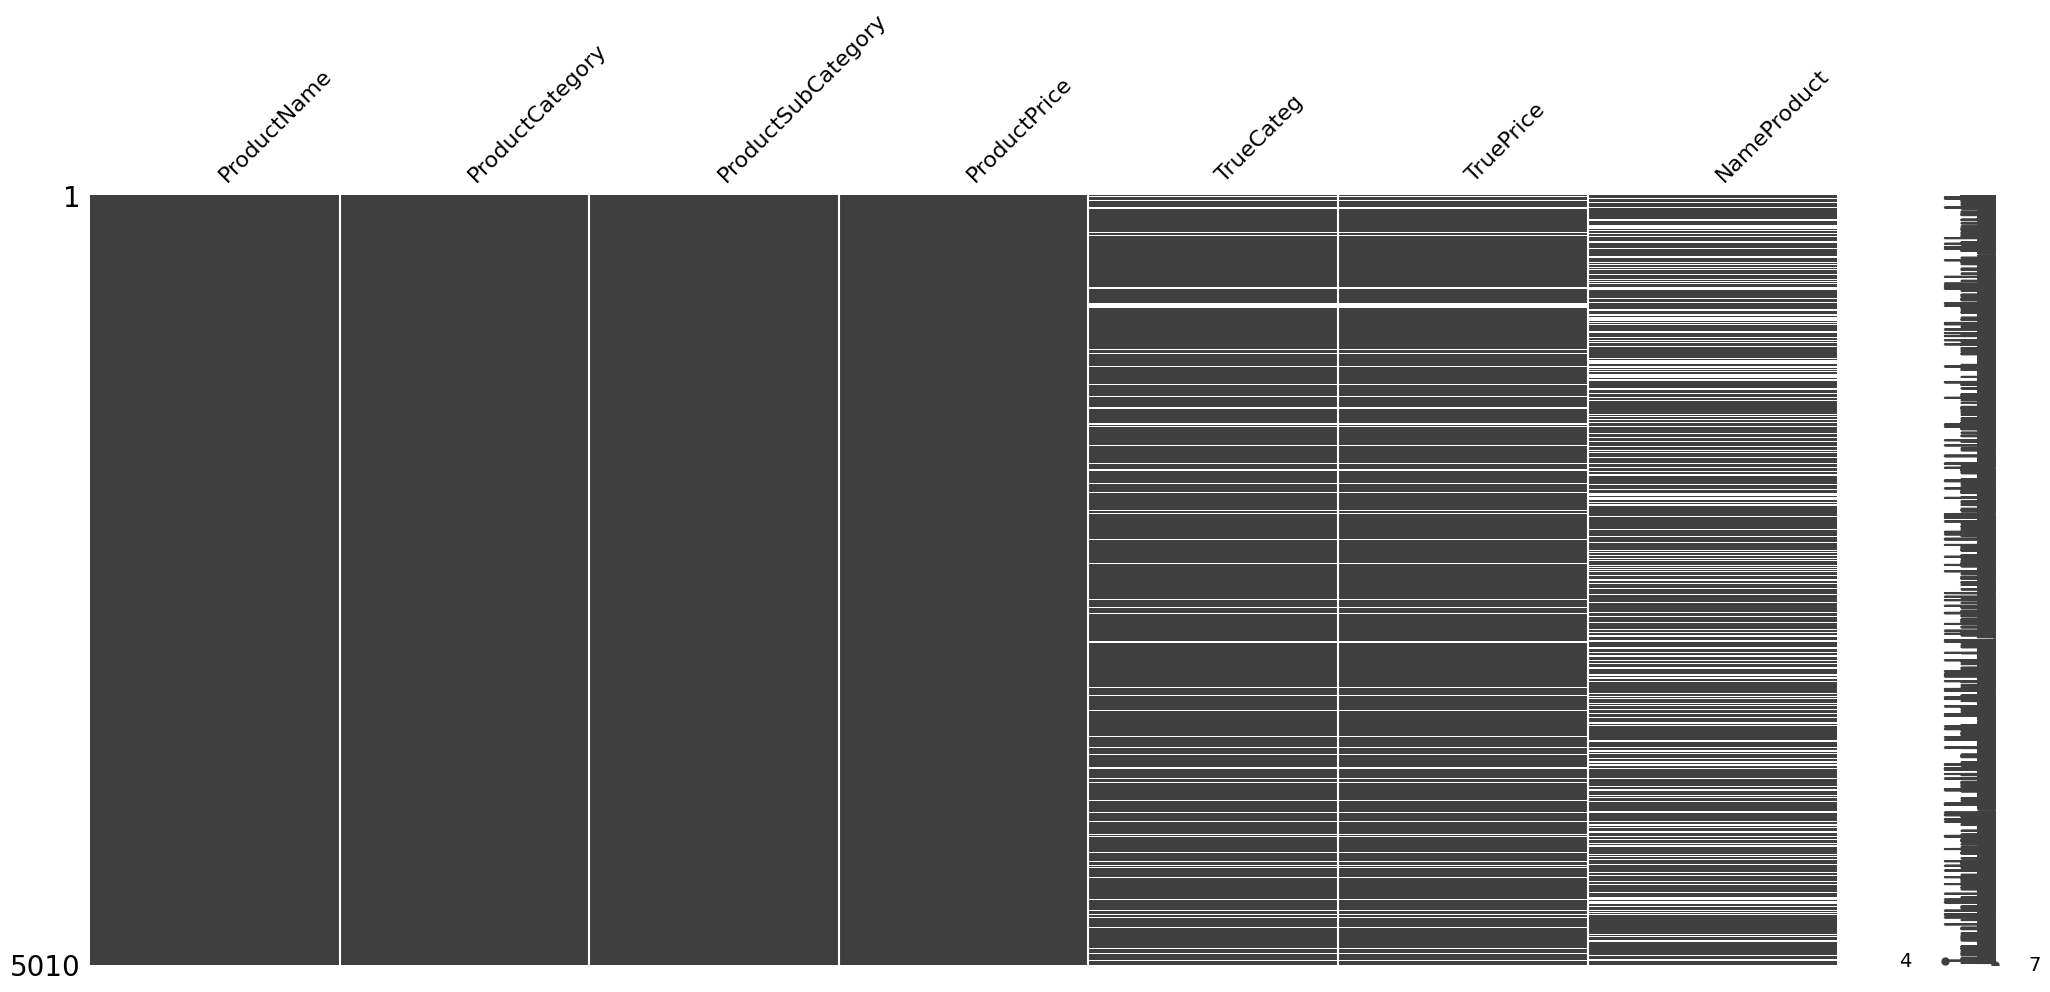

In [85]:
msno.matrix(productDim)

In [69]:
# Filtrer pour obtenir toutes les lignes où le product_name est 'NonExistentProduct'
product_occurrences = productDim[productDim['ProductName'] == 'NonExistentProduct']

# Afficher les résultats
product_occurrences

,ProductName,ProductCategory,ProductSubCategory,ProductPrice,TrueCateg,TruePrice
1,NonExistentProduct,Electronics,Mobile,847.43,None,NaN
5,NonExistentProduct,Electronics,Mobile,847.43,None,NaN
7,NonExistentProduct,Electronics,Camera,652.35,None,NaN
9,NonExistentProduct,Home & Garden,Decor,364.01,None,NaN
14,NonExistentProduct,Books,Fiction,99999.99,None,NaN
...,...,...,...,...,...,...
4965,NonExistentProduct,Electronics,Headphones,651.11,None,NaN
4971,NonExistentProduct,Home & Garden,Decor,364.01,None,NaN
4980,NonExistentProduct,Electronics,Headphones,22882.0,None,NaN
4981,NonExistentProduct,Electronics,Headphones,InvalidPrice,None,NaN


In [108]:
# Filtrer pour obtenir toutes les lignes où le product_name est 'NonExistentProduct'
product_occurrences2 = productDim[productDim['NameProduct'] == 'NonExistentProduct']

# Afficher les résultats
b = product_occurrences2.drop_duplicates

In [109]:
b

<bound method DataFrame.drop_duplicates of              ProductName ProductCategory ProductSubCategory  ProductPrice  \
14    NonExistentProduct           Books            Fiction      99999.99   
23    NonExistentProduct   Home & Garden              Decor  InvalidPrice   
81    NonExistentProduct           Books        Non-fiction       64211.0   
280   NonExistentProduct        Clothing              Shirt          0.01   
317   NonExistentProduct     Electronics         Headphones          0.01   
...                  ...             ...                ...           ...   
4681  NonExistentProduct           Books            Fiction  InvalidPrice   
4699  NonExistentProduct     Electronics         Headphones      99999.99   
4744  NonExistentProduct     Electronics         Headphones  InvalidPrice   
4980  NonExistentProduct     Electronics         Headphones       22882.0   
4981  NonExistentProduct     Electronics         Headphones  InvalidPrice   

     TrueCateg  TruePrice       

In [70]:
product_occurrences.ProductCategory.unique()

array(['Electronics', 'Home & Garden', 'Books', 'InvalidCategory',
       'Clothing', 'Toys'], dtype=object)

In [102]:
a = product_occurrences[product_occurrences['ProductCategory'] == 'InvalidCategory']
aa = a.drop_duplicates()

In [104]:
aa.shape

(29, 6)

In [105]:
aa

,ProductName,ProductCategory,ProductSubCategory,ProductPrice,TrueCateg,TruePrice
40,NonExistentProduct,InvalidCategory,Dolls,46.23,None,NaN
487,NonExistentProduct,InvalidCategory,Non-fiction,642.11,None,NaN
576,NonExistentProduct,InvalidCategory,Academic,InvalidPrice,None,NaN
622,NonExistentProduct,InvalidCategory,Fiction,433.1,None,NaN
661,NonExistentProduct,InvalidCategory,Decor,364.01,None,NaN
705,NonExistentProduct,InvalidCategory,Academic,951.53,None,NaN
944,NonExistentProduct,InvalidCategory,Educational,26861.0,None,NaN
1218,NonExistentProduct,InvalidCategory,Shirt,84019.0,None,NaN
1481,NonExistentProduct,InvalidCategory,Shirt,840.19,None,NaN
1492,NonExistentProduct,InvalidCategory,Dolls,99999.99,None,NaN


In [ ]:
subCatMapping = {
("Camera",652.35):"Nathaniel",
("Action Figures",386.57):"Angela",
("Decor",364.01):"Amy",
("Headphones",660.05):"Justin",
("Gardening Tools",68.01):"Shannon",
("Fiction",433.1):"Martha",
("Shirt",840.19):"Elizabeth",
("Fiction",930.3):"Jamie",
("Mobile",847.43):"Robert",
("Headphones",461.09):"Shawn",
("Academic",693.39):"Anthony",
("Headphones",651.11):"Pamela",
("Academic",951.53):"Fred",
("Educational",268.61):"Wanda",
("Headphones",872.85):"Cynthia",
("Shirt",995.13):"Marvin",
("Non-fiction",642.11):"Katie",
("Furniture",431.82):"Tammy",
("Dolls",46.23):"Michael",
("Headphones",228.82):"Kristine",
}



In [106]:
import pandas as pd
import numpy as np

def assigner_nom_produit(row):
    subcat = row['ProductSubCategory']
    
    # Essayer d'abord ProductPrice, puis TruePrice
    try:
        price = float(row['ProductPrice'])
    except ValueError:
        try:
            price = float(row['TruePrice'])
        except ValueError:
            return row['ProductName']  # Retourner le nom original si les deux prix sont invalides

    # Définir les correspondances
    subCatMapping = {
        ("Camera", 652.35): "Nathaniel",
        ("Action Figures", 386.57): "Angela",
        ("Decor", 364.01): "Amy",
        ("Headphones", 660.05): "Justin",
        ("Gardening Tools", 68.01): "Shannon",
        ("Fiction", 433.1): "Martha",
        ("Shirt", 840.19): "Elizabeth",
        ("Fiction", 930.3): "Jamie",
        ("Mobile", 847.43): "Robert",
        ("Headphones", 461.09): "Shawn",
        ("Academic", 693.39): "Anthony",
        ("Headphones", 651.11): "Pamela",
        ("Academic", 951.53): "Fred",
        ("Educational", 268.61): "Wanda",
        ("Headphones", 872.85): "Cynthia",
        ("Shirt", 995.13): "Marvin",
        ("Non-fiction", 642.11): "Katie",
        ("Furniture", 431.82): "Tammy",
        ("Dolls", 46.23): "Michael",
        ("Headphones", 228.82): "Kristine",
    }

    # Vérifier les correspondances
    for (s, p), name in subCatMapping.items():
        if subcat == s and np.isclose(price, p, atol=0.01):
            return name

    return row['ProductName']  # Retourner le nom original si pas de correspondance

# Appliquer la fonction à chaque ligne du DataFrame
productDim['NameProduct'] = productDim.apply(assigner_nom_produit, axis=1)

# Afficher le DataFrame mis à jour
print(productDim)

             ProductName  ProductCategory ProductSubCategory ProductPrice  \
0              Nathaniel      Electronics             Camera         0.01   
1     NonExistentProduct      Electronics             Mobile       847.43   
2                 Angela  InvalidCategory     Action Figures       386.57   
3                    Amy    Home & Garden              Decor       364.01   
4              Nathaniel      Electronics             Camera       652.35   
...                  ...              ...                ...          ...   
5005              Angela             Toys     Action Figures       386.57   
5006              Angela             Toys     Action Figures       386.57   
5007              Angela             Toys     Action Figures       386.57   
5008              Angela             Toys     Action Figures       386.57   
5009              Angela             Toys     Action Figures       386.57   

          TrueCateg  TruePrice NameProduct  
0       Electronics     652.35

C:\Users\sakhr\AppData\Local\Temp\ipykernel_12620\4149962231.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  productDim['NameProduct'] = productDim.apply(assigner_nom_produit, axis=1)


In [ ]:
b = product_occurrences[product_occurrences['ProductCategory'] == 'InvalidCategory']
bb = a.drop_duplicates()

In [ ]:
bb

In [29]:
check_consistency_nonExistent = product_occurrences.groupby('ProductName').agg({
    'ProductCategory': 'nunique',
    'ProductSubCategory': 'nunique'
})

In [30]:
check_consistency_nonExistent

,ProductCategory,ProductSubCategory
ProductName,,
NonExistentProduct,6,13
